In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

# SGD Fundamental e 2º Harmonico

In [74]:
df = pd.read_csv('../../Banco de Dados Matlab/dataset_fundamental_harmonicos_2.csv')

display(df)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,H2_Amostras_498,H2_Amostras_499,H2_Amostras_500,classe,Freq_analisada_Hz,Freq_h2_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,17.3608216838215+4.25140042787427j,3.45261167275853+5.5791757461025j,-2.14229390191488-7.5319749514892j,1,33,66,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,1.98860946539622+11.4826960906897j,8.4324507952459+13.6968557537105j,4.04640116492-6.43283197855137j,1,37,74,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,-7.49787814132775+6.0624925339652j,-8.37085673385154-2.82956343289286j,-1.86727999331199+0.930871326230535j,1,41,82,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,12.5278361754721+6.01691797702104j,-7.97842917981821+4.68599431159664j,-7.26315912062752-3.39524788053018j,1,45,90,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,1.49404663648417+11.2979506171104j,8.49069449759489-3.85021706136149j,12.9949923539745-2.82574387706702j,1,35,70,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.3274345755803+26.9357637321677j,-15.5496644158336-5.21643770681257j,14.1196384919316+6.14174226630607j,-8.22909234523791+5.87514323760918j,1.32412105806644+2.54935647550623j,-6.74907644571846-35.4737928305186j,-20.7216164490164+0.849952191827506j,-2.78725672550089-1.32634899690209j,9.92531304379335-9.60904408347513j,0.162998461843623-9.4792978517918j,...,1.00948522244494-0.984941362697078j,0.229919682558184-0.10419330670053j,1.11585162611134+1.44741411691319j,0,71,142,80,50,C3,YR
10556,-0.572329433784967+8.25221387170711j,12.8589805365523+5.82557284096784j,1.93609334295198+6.20401773858624j,15.7301444150585-9.28372603094602j,-0.349781960167631-7.91708348818648j,2.89243095493668-16.4686806509862j,6.58478506071125-6.39603604781743j,8.05110420291511-12.18239602231j,-3.6693002288545+4.37267800165931j,8.12001856571014+18.4377271569694j,...,0.12580718137619-0.00363493950845464j,-0.67937335329321+1.0071307157964j,0.952299345678594-0.00487213846730219j,0,72,144,80,50,C3,YR
10557,6.99865189956078-8.22808996063498j,30.4029796708906-7.59755146326457j,15.3593191201729-10.4773307276728j,-1.40524371397176-14.177826719128j,-16.3536238871252+8.05940946964358j,-1.97808048980994+4.36188578343598j,-7.85794374835439+9.035

In [76]:
df.classe.value_counts()

classe
0    8448
1    2112
Name: count, dtype: int64

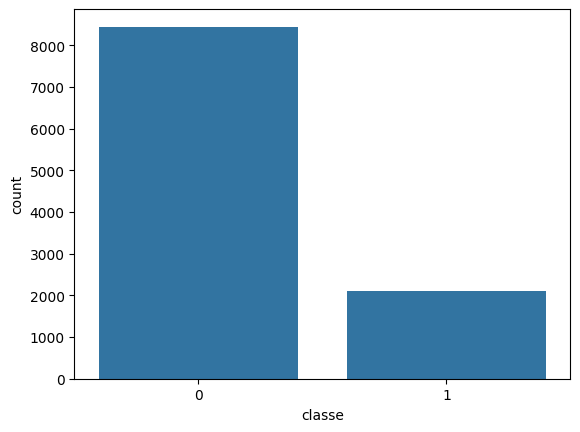

In [5]:
import seaborn as sns

ax = sns.countplot(x='classe', data=df)

In [77]:
y = df['classe']

In [78]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10555    0
10556    0
10557    0
10558    0
10559    0
Name: classe, Length: 10560, dtype: int64


In [79]:
X = df.drop(['classe', 
             'Freq_analisada_Hz', 
             'Freq_h2_analisada_Hz', 
             #'Freq_h3_analisada_Hz', 
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)


In [80]:
X.columns = range(X.shape[1]) #Remove o Header

In [81]:
complex_columns = X.columns
X[complex_columns] = X[complex_columns].map(lambda x: complex(x))

In [82]:
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+ 5.138044j,8.489090+12.249626j,...,2.684201+ 6.903897j,9.039897+ 0.063738j,9.733968+ 5.785735j,-2.978852+ 2.972093j,3.975621+0.138855j,-5.443892+0.023034j,-1.312115-4.718385j,17.360822+ 4.251400j,3.452612+ 5.579176j,-2.142294- 7.531975j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407- 2.509913j,-8.317999- 1.950383j,...,6.306721+ 0.523812j,-7.186571+ 2.664793j,1.815685- 5.864991j,6.857271- 9.200398j,5.287621-6.835752j,-0.373793+7.232093j,1.505372+0.771476j,1.988609+11.482696j,8.432451+13.696856j,4.046401- 6.432832j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+ 3.931984j,8.295725- 6.293511j,...,11.724511+ 9.167683j,-6.158582+ 5.330302j,9.034814- 1.005744j,7.733599+ 4.937707j,-3.643471+7.158544j,4.795277+5.546327j,-2.474693-0.931219j,-7.497878+ 6.062493j,-8.370857- 2.829563j,-1.867280+ 0.930871j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+ 2.319779j,5.151437+ 7.147965j,...,-2.332002- 6.513605j,-3.571802- 2.281648j,11.942915+ 1.124562j,10.556913-16.158195j,6.033167+9.342920j,3.253191+1.164733j,-8.785676+2.362344j,12.527836+ 6.016918j,-7.978429+ 4.685994j,-7.263159- 3.395248j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109- 5.639534j,15.910005+ 6.039353j,...,1.598795+ 1.902422j,14.206067+10.049330j,11.222423+ 3.786241j,-6.785293+ 8.770586j,4.148249-0.946978j,0.623592+8.462934j,-8.736576+5.656894j,1.494047+11.297951j,8.490694- 3.850217j,12.994992- 2.825744j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.327435+26.935764j,-15.549664- 5.216438j,14.119638+ 6.141742j,-8.229092+ 5.875143j,1.324121+ 2.549356j,-6.749076-35.473793j,-20.721616+ 0.849952j,-2.787257- 1.326349j,9.925313- 9.609044j,0.162998- 9.479298j,...,-0.465780- 2.017303j,-0.943863- 0.457372j,-0.302931+ 0.840800j,0.998842- 0.486806j,-0.812747-2.388292j,-0.613321-0.353663j,-0.285232+0.268596j,1.009485- 0.984941j,0.229920- 0.104193j,1.115852+ 1.447414j
10556,-0.572329+ 8.252214j,12.858981+ 5.825573j,1.936093+ 6.204018j,15.730144- 9.283726j,-0.349782- 7.917083j,2.892431-16.468681j,6.584785- 6.396036j,8.051104-12.182396j,-3.669300+ 4.372678j,8.120019+18.437727j,...,-0.026752+ 1.916978j,-1.155980- 0.757759j,-1.316212+ 0.550815j,0.729175- 0.268859j,-1.004867-0.110721j,1.925758-1.497789j,-2.255291-0.337281j,0.125807- 0.003635j,-0.679373+ 1.007131j,0.952299- 0.004872j
10557,6.998652- 8.228090j,30.402980- 7.597551j,15.359319-10.477331j,-1.405244-14.177827j,-16.353624+ 8.059409j,-1.978080+ 4.361886j,-7.857944+ 9.035697j,-5.998373+ 4.730584j,-2.811780- 0.553831j,-17.187764-10.173613j,...,0.044933- 0.467562j,1.264120+ 0.335595j,0.837386+ 1.289720j,-1.450430- 0.656881j,0.529384-1.035749j,1.016273+1.448300j,-0.338287+1.501771j,-0.546649+ 1.718557j,0.444390+ 1.338372j,0.866137- 0.362047j
10558,7.370864+20.946933j,-8.529564+ 0.612177j,3.651349- 2.436474j,1.173640+13.472091j,10.739745+ 4.604096j,3.766699- 0.476116j,16.157152+10.043900j,17.708850- 0.695161j,-6.445788+ 8.282840j,12.309522-14.909443j,...,0.102812- 0.268203j,-0.451536+ 1.641868j,-2.057540+ 0.485912j,-0.907945+ 0.730692j,-0.977901+2.299150j,1.252270-0.532676j,-1.992608-1.669407j,0.215121+ 0.028563j,0.124983+ 1.163352j,-0.433071- 0.453100j


## Treinamento

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)


In [84]:
X_train_rec = X_train.copy()
X_train = np.abs(X_train)

X_test_rec = X_test.copy()
X_test = np.abs(X_test)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


param_grid_sgd = {
    'alpha': [0.0001, 0.0005, 0.00005, 0.001],
    'loss': ['log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet', None]
}

model_sgd = SGDClassifier(max_iter=300, early_stopping=True, random_state=42, verbose=2)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv=10, scoring='roc_auc')
grid_sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 824.39, NNZs: 1000, Bias: -1045.893306, T: 6842, Avg. loss: 317.463171
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 615.17, NNZs: 1000, Bias: -679.779083, T: 13684, Avg. loss: 94.560649
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 510.54, NNZs: 1000, Bias: -482.697154, T: 20526, Avg. loss: 53.407445
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 424.21, NNZs: 1000, Bias: -372.096997, T: 27368, Avg. loss: 38.143335
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 365.59, NNZs: 1000, Bias: -300.285933, T: 34210, Avg. loss: 28.629979
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 316.81, NNZs: 1000, Bias: -250.181190, T: 41052, Avg. loss: 22.843057
Total training time: 0.07 seconds.
Convergence after 6 epochs took 0.07 seconds
-- Epoch 1
Norm: 811.94, NNZs: 1000, Bias: -974.062167, T: 6842, Avg. loss: 323.224400
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 597.12, NNZs: 1000, Bias: -627.246154, T: 13684, Avg. loss: 87.893113
Total trainin

GridSearchCV(cv=10,
             estimator=SGDClassifier(early_stopping=True, max_iter=300,
                                     random_state=42, verbose=2),
             param_grid={'alpha': [0.0001, 0.0005, 5e-05, 0.001],
                         'loss': ['log_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]},
             scoring='roc_auc')

In [87]:
best_params_sgd = grid_sgd.best_params_
best_score_sgd = grid_sgd.best_score_

In [88]:
print(best_params_sgd)
print(best_score_sgd)

{'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'elasticnet'}
0.7375177670405255


In [89]:
final_model_sgd = SGDClassifier(
    alpha= best_params_sgd['alpha'],
    loss= best_params_sgd['loss'],
    penalty= best_params_sgd['penalty'],
)

final_model_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log_loss', penalty='elasticnet')

In [90]:
from sklearn import metrics

y_pred_sgd = final_model_sgd.predict(X_test)

acc_sgd = metrics.accuracy_score(y_test, y_pred_sgd)

print(acc_sgd)

0.7916666666666666


In [91]:
print(pd.crosstab(y_test,y_pred_sgd, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_test,y_pred_sgd)

print(cm_sgd)

Previsão     0    1   All
Real                     
0         1567  123  1690
1          317  105   422
All       1884  228  2112 
[[1567  123]
 [ 317  105]]


In [92]:
y_proba = final_model_sgd.predict_proba(X_test)

y_proba

array([[0.9877223 , 0.0122777 ],
       [0.99747285, 0.00252715],
       [0.81690084, 0.18309916],
       ...,
       [0.92900716, 0.07099284],
       [0.77703751, 0.22296249],
       [0.96623617, 0.03376383]])

In [93]:
limiar = 0.9897
y_pred_limiar = (y_proba[:,1] > limiar)

y_pred_limiar = np.multiply(y_pred_limiar, 1)

y_pred_limiar

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_limiar).ravel()

taxa_fp = fp/(tn+fp)
taxa_detec_limiar = tp/(tp+fp)

print(pd.crosstab(y_test,y_pred_limiar, rownames=['Real'], colnames=['Previsão'], margins=True),'')
print('-------')
print(taxa_fp)
print(taxa_detec_limiar)

Previsão     0  1   All
Real                   
0         1689  1  1690
1          419  3   422
All       2108  4  2112 
-------
0.000591715976331361
0.75


In [95]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba[:,1])

0.7481077708292437

In [195]:
from sklearn.metrics import roc_curve

fpr_h2, tpr_h2, threshold = roc_curve(y_test, y_proba[:,1])

## Roc Curve

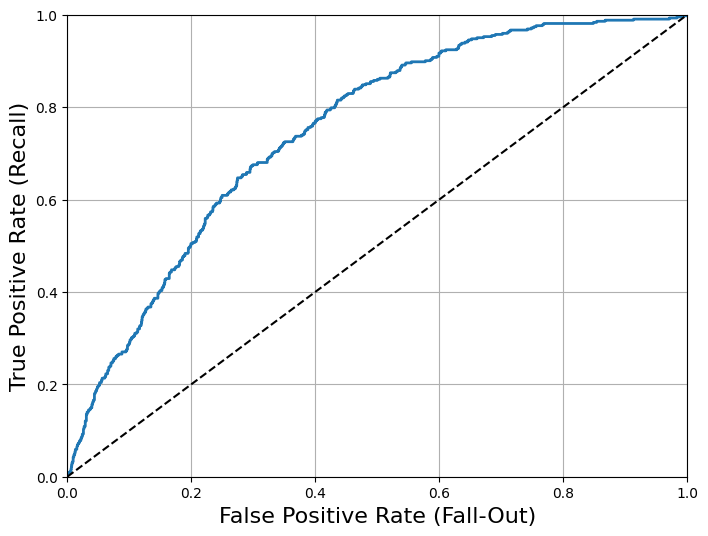

In [196]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_h2, tpr_h2)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

# Fundamental e 3º Harmonico

In [109]:
df_h3 = pd.read_csv('../../Banco de Dados Matlab/dataset_harmonicos_final.csv')
df_h3 = df_h3.replace('i', 'j', regex=True)

display(df_h3)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,H3_Amostras_499,H3_Amostras_500,classe,Freq_analisada_Hz,Freq_h2_analisada_Hz,Freq_h3_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,2.96261529939806+4.79710086212997j,-7.31741358674807+4.70537845918188j,1,33,66,99,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,-6.20208475102569+2.46727892927902j,7.16105057407892-5.27781760021583j,1,37,74,111,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,1.87849811188896-3.34825859449435j,1.00752836863572-4.40525244757286j,1,41,82,123,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,-4.84953649277811+9.19287403509272j,1.24583961895532-0.785187914779904j,1,45,90,135,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,-6.58425431634076+6.21617242295601j,3.21541169380933-0.890780116261766j,1,35,70,105,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.3274345755803+26.9357637321677j,-15.5496644158336-5.21643770681257j,14.1196384919316+6.14174226630607j,-8.22909234523791+5.87514323760918j,1.32412105806644+2.54935647550623j,-6.74907644571846-35.4737928305186j,-20.7216164490164+0.849952191827506j,-2.78725672550089-1.32634899690209j,9.92531304379335-9.60904408347513j,0.162998461843623-9.4792978517918j,...,-0.346772305299857-0.608937326772358j,-0.541270342735416-0.461839636262364j,0,71,142,213,80,50,C3,YR
10556,-0.572329433784967+8.25221387170711j,12.8589805365523+5.82557284096784j,1.93609334295198+6.20401773858624j,15.7301444150585-9.28372603094602j,-0.349781960167631-7.91708348818648j,2.89243095493668-16.4686806509862j,6.58478506071125-6.39603604781743j,8.05110420291511-12.18239602231j,-3.6693002288545+4.37267800165931j,8.12001856571014+18.4377271569694j,...,0.199996020026519+0.406525014506288j,0.371898950963408-0.356910948491636j,0,72,144,216,80,50,C3,YR
10557,6.99865189956078-8.22808996063498j,30.4029796708906-7.59755146326457j,15.3593191201729-10.4773307276728j,-1.40524371397176-14.177826719128j,-16.3536238871252+8.05940946964358j,-1.97808048980994+4.36188578343598j,-7.85794374835439+9.03569681531819j,-5.99837315049435+4.73058413046644j,-2.81177966146356-0.553830877260253j,-17.187763763876-10.1736130830448j,...,1.14132451883314-0.654702173949636j,0.225930274410618+0.673270303138616j,0,73,146

In [111]:
y_h3 = df_h3['classe']

X_h3 = df_h3.drop(['classe', 
             'Freq_analisada_Hz', 
             'Freq_h2_analisada_Hz', 
             'Freq_h3_analisada_Hz',
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)

X_h3.columns = range(X_h3.shape[1]) #Remove o Header

complex_columns_h3 = X_h3.columns
X_h3[complex_columns_h3] = X_h3[complex_columns_h3].map(lambda x: complex(x))

X_h3

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+ 5.138044j,8.489090+12.249626j,...,9.103566+ 9.435897j,-2.336631+8.832988j,-10.832451+ 3.993835j,3.137490- 8.468658j,-1.075295- 2.527197j,-0.810220- 0.247064j,-0.751739- 8.966414j,-0.260227-1.658156j,2.962615+4.797101j,-7.317414+4.705378j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407- 2.509913j,-8.317999- 1.950383j,...,-7.927804+23.548019j,-1.802322+1.824562j,-5.770971- 4.981372j,-0.882026+ 3.253547j,-5.363731+17.628109j,6.751917+12.662941j,12.496561- 3.695809j,0.331880-2.503308j,-6.202085+2.467279j,7.161051-5.277818j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+ 3.931984j,8.295725- 6.293511j,...,-2.828696- 0.128646j,-4.818398-1.112234j,-6.198374- 3.297027j,-3.874503- 1.408132j,-5.343530+ 4.601522j,4.447575- 3.343470j,-2.337388+ 0.455804j,-1.842735+4.406146j,1.878498-3.348259j,1.007528-4.405252j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+ 2.319779j,5.151437+ 7.147965j,...,6.727956- 0.202927j,-1.277419-6.208759j,-4.230843- 8.575140j,-2.162852+ 6.092543j,5.071535+ 2.249921j,-0.274669+ 0.484113j,4.154815- 5.514289j,1.909024-1.733071j,-4.849536+9.192874j,1.245840-0.785188j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109- 5.639534j,15.910005+ 6.039353j,...,-15.713207- 7.360471j,3.954299-4.250394j,9.414769+ 6.879545j,-1.026652+11.922406j,-12.809472- 5.596903j,-0.780966+ 6.459646j,3.466773+12.504563j,-6.099464-3.780927j,-6.584254+6.216172j,3.215412-0.890780j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.327435+26.935764j,-15.549664- 5.216438j,14.119638+ 6.141742j,-8.229092+ 5.875143j,1.324121+ 2.549356j,-6.749076-35.473793j,-20.721616+ 0.849952j,-2.787257- 1.326349j,9.925313- 9.609044j,0.162998- 9.479298j,...,-0.353516- 0.293082j,0.643100-1.383377j,0.306712- 0.499390j,0.105017- 0.604966j,0.345386- 1.287847j,-1.027101+ 0.183082j,0.245676- 0.013201j,-1.166743-0.016434j,-0.346772-0.608937j,-0.541270-0.461840j
10556,-0.572329+ 8.252214j,12.858981+ 5.825573j,1.936093+ 6.204018j,15.730144- 9.283726j,-0.349782- 7.917083j,2.892431-16.468681j,6.584785- 6.396036j,8.051104-12.182396j,-3.669300+ 4.372678j,8.120019+18.437727j,...,0.694643- 0.026864j,-0.063630+0.240890j,-0.032491+ 0.695689j,0.259573+ 0.592758j,0.789648- 1.595031j,-1.465266- 0.617795j,-0.337945- 1.499608j,0.383505+0.747204j,0.199996+0.406525j,0.371899-0.356911j
10557,6.998652- 8.228090j,30.402980- 7.597551j,15.359319-10.477331j,-1.405244-14.177827j,-16.353624+ 8.059409j,-1.978080+ 4.361886j,-7.857944+ 9.035697j,-5.998373+ 4.730584j,-2.811780- 0.553831j,-17.187764-10.173613j,...,0.363716+ 2.196350j,0.136525-0.436040j,0.849461+ 1.189694j,-0.095720+ 0.704732j,-0.404787- 0.772581j,-0.564137+ 0.097744j,0.432410+ 0.369457j,-0.204674-0.847866j,1.141325-0.654702j,0.225930+0.673270j
10558,7.370864+20.946933j,-8.529564+ 0.612177j,3.651349- 2.436474j,1.173640+13.472091j,10.739745+ 4.604096j,3.766699- 0.476116j,16.157152+10.043900j,17.708850- 0.695161j,-6.445788+ 8.282840j,12.309522-14.909443j,...,1.013888- 0.524917j,0.329138-0.113132j,-0.848165+ 0.351322j,0.209167+ 0.186837j,-0.173675- 0.492673j,0.380564+ 0.681536j,2.065110- 0.469938j,-1.070319+0.614218j,0.378839-0.320004j,0.005188+0.258852j


## Treinamento

In [164]:
from sklearn.model_selection import train_test_split
X_train_h3, X_test_h3, y_train_h3, y_test_h3 = train_test_split(X_h3, y_h3,
                                                    test_size=0.2,
                                                    stratify=y_h3)


In [165]:
X_train_rec_h3 = X_train_h3.copy()
X_train_h3 = np.abs(X_train_h3)

X_test_rec_h3 = X_test_h3.copy()
X_test_h3 = np.abs(X_test_h3)

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_h3 = scaler.fit_transform(X_train_h3)
X_test_h3 = scaler.transform(X_test_h3)

In [167]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


param_grid_sgd = {
    'alpha': [0.0001, 0.0005, 0.00005, 0.001],
    'loss': ['log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet', None]
}

model_sgd = SGDClassifier(max_iter=300, early_stopping=True, random_state=42, verbose=2)

grid_sgd_h3 = GridSearchCV(model_sgd, param_grid_sgd, cv=10, scoring='roc_auc')
grid_sgd_h3.fit(X_train_h3, y_train_h3)

-- Epoch 1
Norm: 1072.90, NNZs: 1500, Bias: -1461.054245, T: 6842, Avg. loss: 432.318253
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 834.31, NNZs: 1500, Bias: -1032.862855, T: 13684, Avg. loss: 123.769750
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 722.53, NNZs: 1500, Bias: -803.535757, T: 20526, Avg. loss: 69.686840
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 623.90, NNZs: 1500, Bias: -680.458679, T: 27368, Avg. loss: 47.728153
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 571.37, NNZs: 1500, Bias: -570.208572, T: 34210, Avg. loss: 37.006513
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 524.06, NNZs: 1500, Bias: -494.922565, T: 41052, Avg. loss: 29.179669
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 480.11, NNZs: 1500, Bias: -442.011166, T: 47894, Avg. loss: 25.076863
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 445.81, NNZs: 1500, Bias: -396.319208, T: 54736, Avg. loss: 21.036807
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 416

GridSearchCV(cv=10,
             estimator=SGDClassifier(early_stopping=True, max_iter=300,
                                     random_state=42, verbose=2),
             param_grid={'alpha': [0.0001, 0.0005, 5e-05, 0.001],
                         'loss': ['log_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]},
             scoring='roc_auc')

In [168]:
best_params_sgd_h3 = grid_sgd_h3.best_params_
best_score_sgd_h3 = grid_sgd_h3.best_score_


print(best_params_sgd_h3)

{'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'elasticnet'}


In [206]:
final_model_sgd_h3 = SGDClassifier(
    alpha= best_params_sgd['alpha'],
    loss= best_params_sgd['loss'],
    penalty= best_params_sgd['penalty'],
)

final_model_sgd_h3.fit(X_train_h3, y_train_h3)

SGDClassifier(alpha=0.001, loss='log_loss', penalty='elasticnet')

In [207]:
from sklearn import metrics

y_pred_sgd_h3 = final_model_sgd_h3.predict(X_test_h3)

acc_sgd_h3 = metrics.accuracy_score(y_test_h3, y_pred_sgd_h3)

print(acc_sgd_h3)

0.7921401515151515


In [208]:
print(pd.crosstab(y_test_h3,y_pred_sgd_h3, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd_h3 = confusion_matrix(y_test_h3,y_pred_sgd_h3)

print(cm_sgd_h3)

Previsão     0    1   All
Real                     
0         1497  193  1690
1          246  176   422
All       1743  369  2112 
[[1497  193]
 [ 246  176]]


In [209]:
y_proba_h3 = final_model_sgd_h3.predict_proba(X_test_h3)
y_proba_h3

array([[9.99993174e-01, 6.82583832e-06],
       [4.52571223e-01, 5.47428777e-01],
       [9.99933246e-01, 6.67542376e-05],
       ...,
       [9.99999532e-01, 4.68435958e-07],
       [9.99516106e-01, 4.83894347e-04],
       [9.99964409e-01, 3.55912570e-05]])

In [210]:
limiar = 0.9897
y_pred_limiar_h3 = (y_proba_h3[:,1] > limiar)

y_pred_limiar_h3 = np.multiply(y_pred_limiar_h3, 1)

y_pred_limiar_h3

array([0, 0, 0, ..., 0, 0, 0])

In [211]:
tn, fp, fn, tp = confusion_matrix(y_test_h3,y_pred_limiar_h3).ravel()

taxa_fp = fp/(tn+fp)
taxa_detec_limiar = tp/(tp+fp)

print(pd.crosstab(y_test_h3,y_pred_limiar_h3, rownames=['Real'], colnames=['Previsão'], margins=True),'')
print('-------')
print(taxa_fp)
print(taxa_detec_limiar)

Previsão     0   1   All
Real                    
0         1678  12  1690
1          402  20   422
All       2080  32  2112 
-------
0.007100591715976331
0.625


## Roc Curve

In [212]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_h3, y_proba_h3[:,1])

0.766296727333913

In [213]:
from sklearn.metrics import roc_curve

fpr_h3, tpr_h3, threshold = roc_curve(y_test_h3, y_proba_h3[:,1])

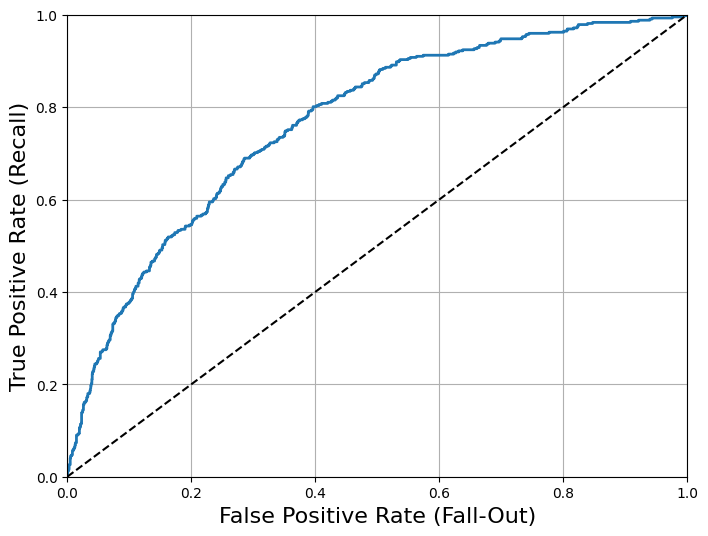

In [214]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_h3, tpr_h3)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

## Salvando a ML

In [172]:
import pickle

pickle.dump(final_model_sgd_h3, open('model_sgd_v1.pkl', 'wb'))

# SGD Sem Harmonicos

In [125]:
df_no_harm = pd.read_csv('../../Banco de Dados Matlab/dados_fundamental.csv')
df_no_harm = df_no_harm.replace('i', 'j', regex=True)

display(df_no_harm)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,-28.9453463142943-21.6304959537416j,-9.19706269084625-4.7768259353937j,9.01423925727307-10.1986834977578j,10.8333209474169+4.1303505528859j,1,33,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,-7.77465828570368+6.67007688514336j,-16.3066217132743-1.33421106945253j,15.7168302816696+1.66835119876892j,-8.22206670206577+9.88365693946781j,1,37,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,-0.702039368136772-6.47090923634808j,-1.90915569723743+0.038460878155894j,1.87654516838996-3.85444284179093j,-2.53931374086284-8.18505752611262j,1,41,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,3.98637655597113+9.47765688816421j,0.997033700699956-9.35423387583864j,-3.36588504598374-9.64001409114187j,1.16062075000301+13.1098799183474j,1,45,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,-2.7319403539445+0.311077933404636j,-2.75289128653264+7.35270460275029j,17.2120994723809-1.01519107216341j,-12.9170268288462+11.2994210537745j,1,35,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.3274345755803+26.9357637321677j,-15.5496644158336-5.21643770681257j,14.1196384919316+6.14174226630607j,-8.22909234523791+5.87514323760918j,1.32412105806644+2.54935647550623j,-6.74907644571846-35.4737928305186j,-20.7216164490164+0.849952191827506j,-2.78725672550089-1.32634899690209j,9.92531304379335-9.60904408347513j,0.162998461843623-9.4792978517918j,...,1.37589829559206-1.50013429092299j,-2.23389162139951+0.412899501454078j,0.390015424326432-1.3968576225541j,2.39562190962819+0.782084755268011j,0,71,80,50,C3,YR
10556,-0.572329433784967+8.25221387170711j,12.8589805365523+5.82557284096784j,1.93609334295198+6.20401773858624j,15.7301444150585-9.28372603094602j,-0.349781960167631-7.91708348818648j,2.89243095493668-16.4686806509862j,6.58478506071125-6.39603604781743j,8.05110420291511-12.18239602231j,-3.6693002288545+4.37267800165931j,8.12001856571014+18.4377271569694j,...,1.89645797488203-4.51856151379259j,-0.21938636695609-1.68425159397409j,1.43836409313883+0.229898361467566j,1.22276440577535-0.387850424235358j,0,72,80,50,C3,YR
10557,6.99865189956078-8.2

In [126]:
y_nh = df_no_harm['classe']

In [127]:
X_nh = df_no_harm.drop(['classe', 
             'Freq_analisada_Hz', 
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)

In [128]:
X_nh.columns = range(X_nh.shape[1]) #Remove o Header

In [129]:
complex_columns_nh = X_nh.columns
X_nh[complex_columns_nh] = X_nh[complex_columns_nh].map(lambda x: complex(x))

In [130]:
X_nh

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+ 5.138044j,8.489090+12.249626j,...,10.762492- 6.025673j,-1.632676+ 1.225097j,-7.596579-16.103768j,-0.216726+ 0.316262j,25.630336-14.919646j,-2.060430+ 5.308544j,-28.945346-21.630496j,-9.197063- 4.776826j,9.014239-10.198683j,10.833321+ 4.130351j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407- 2.509913j,-8.317999- 1.950383j,...,8.077006- 2.450638j,5.536716- 2.674598j,3.220150+ 7.451692j,-2.781569+ 0.794667j,-14.826070+ 2.844775j,-0.353782-11.203817j,-7.774658+ 6.670077j,-16.306622- 1.334211j,15.716830+ 1.668351j,-8.222067+ 9.883657j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+ 3.931984j,8.295725- 6.293511j,...,-10.415713+ 2.694269j,-6.855254+ 6.386199j,-7.431757- 0.079620j,0.070872- 0.886761j,3.447768-17.123976j,-1.250024- 7.113759j,-0.702039- 6.470909j,-1.909156+ 0.038461j,1.876545- 3.854443j,-2.539314- 8.185058j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+ 2.319779j,5.151437+ 7.147965j,...,-3.950999- 9.946862j,9.725179-13.849486j,5.468995+ 7.816748j,19.021305- 3.194024j,-0.096165- 3.278488j,4.711426- 5.753388j,3.986377+ 9.477657j,0.997034- 9.354234j,-3.365885- 9.640014j,1.160621+13.109880j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109- 5.639534j,15.910005+ 6.039353j,...,2.340203+ 8.537311j,-2.441823+16.152369j,-7.452733+13.236527j,-1.475344-10.116503j,-16.804818- 2.406014j,5.356770- 4.615183j,-2.731940+ 0.311078j,-2.752891+ 7.352705j,17.212099- 1.015191j,-12.917027+11.299421j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,-20.327435+26.935764j,-15.549664- 5.216438j,14.119638+ 6.141742j,-8.229092+ 5.875143j,1.324121+ 2.549356j,-6.749076-35.473793j,-20.721616+ 0.849952j,-2.787257- 1.326349j,9.925313- 9.609044j,0.162998- 9.479298j,...,1.280232+ 0.876421j,2.873111+ 0.366044j,5.576009- 0.610811j,-0.898610- 2.807594j,-3.554928- 6.115523j,6.695848+ 4.664138j,1.375898- 1.500134j,-2.233892+ 0.412900j,0.390015- 1.396858j,2.395622+ 0.782085j
10556,-0.572329+ 8.252214j,12.858981+ 5.825573j,1.936093+ 6.204018j,15.730144- 9.283726j,-0.349782- 7.917083j,2.892431-16.468681j,6.584785- 6.396036j,8.051104-12.182396j,-3.669300+ 4.372678j,8.120019+18.437727j,...,2.945000- 0.474027j,-1.358094- 1.097580j,0.654973+ 0.942143j,1.737184+ 0.912201j,-2.128059+ 2.018018j,2.514826+ 3.360554j,1.896458- 4.518562j,-0.219386- 1.684252j,1.438364+ 0.229898j,1.222764- 0.387850j
10557,6.998652- 8.228090j,30.402980- 7.597551j,15.359319-10.477331j,-1.405244-14.177827j,-16.353624+ 8.059409j,-1.978080+ 4.361886j,-7.857944+ 9.035697j,-5.998373+ 4.730584j,-2.811780- 0.553831j,-17.187764-10.173613j,...,1.099904- 0.004755j,-3.438795- 1.469665j,2.473197- 3.955061j,-0.209970+ 0.498685j,-1.481330+ 0.198368j,3.097224+ 0.908107j,0.143439+ 0.698815j,-3.910169- 1.407624j,-0.282868- 0.425471j,-0.753911+ 0.419780j
10558,7.370864+20.946933j,-8.529564+ 0.612177j,3.651349- 2.436474j,1.173640+13.472091j,10.739745+ 4.604096j,3.766699- 0.476116j,16.157152+10.043900j,17.708850- 0.695161j,-6.445788+ 8.282840j,12.309522-14.909443j,...,-2.144740- 5.318196j,3.256936+ 0.445912j,4.463332+ 2.049444j,-3.866601- 6.217586j,-1.180780+ 0.098653j,0.717371- 3.307147j,-2.406628+ 0.302128j,2.619004- 0.253828j,-1.526241- 0.020011j,1.094617- 5.240265j


## Treinamento

In [134]:
from sklearn.model_selection import train_test_split
X_train_nh, X_test_nh, y_train_nh, y_test_nh = train_test_split(X_nh, y_nh,
                                                    test_size=0.2,
                                                    stratify=y_nh)

In [135]:
X_train_rec_nh = X_train_nh.copy()
X_train_nh = np.abs(X_train_nh)

X_test_rec_nh = X_test_nh.copy()
X_test_nh = np.abs(X_test_nh)

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_nh = scaler.fit_transform(X_train_nh)
X_test_nh = scaler.transform(X_test_nh)

In [ ]:
from sklearn.linear_model import SGDClassifier

model_sgd_nh = SGDClassifier(max_iter=300, early_stopping=True, random_state=42, verbose=2)

grid_sgd_nh = GridSearchCV(model_sgd_nh, param_grid_sgd, cv=10, scoring='roc_auc')

grid_sgd_nh.fit(X_train_nh, y_train_nh)

In [35]:
best_params_sgd_nh = grid_sgd_nh.best_params_
best_score_sgd_nh = grid_sgd_nh.best_score_

In [36]:
print(best_params_sgd_nh)
print(best_score_sgd_nh)

{'alpha': 0.0005, 'loss': 'modified_huber', 'penalty': 'l2'}
0.7770613248835826


In [137]:
final_model_sgd_nh = SGDClassifier(
    alpha= best_params_sgd['alpha'],
    loss= best_params_sgd['loss'],
    penalty= best_params_sgd['penalty'],
)

final_model_sgd_nh.fit(X_train_nh, y_train_nh)

SGDClassifier(alpha=0.001, loss='log_loss', penalty='elasticnet')

In [138]:
from sklearn import metrics

y_pred_sgd_nh = final_model_sgd_nh.predict(X_test_nh)

acc_sgd_nh = metrics.accuracy_score(y_test_nh, y_pred_sgd_nh)

print(acc_sgd_nh)

0.7855113636363636


In [139]:
print(pd.crosstab(y_test_nh,y_pred_sgd_nh, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd_nh = confusion_matrix(y_test_nh,y_pred_sgd_nh)

print(cm_sgd_nh)

Previsão     0   1   All
Real                    
0         1631  59  1690
1          394  28   422
All       2025  87  2112 
[[1631   59]
 [ 394   28]]


In [140]:
y_proba_nh = final_model_sgd_nh.predict_proba(X_test_nh)
y_proba_nh

array([[0.85215623, 0.14784377],
       [0.57378027, 0.42621973],
       [0.90732111, 0.09267889],
       ...,
       [0.993382  , 0.006618  ],
       [0.51090883, 0.48909117],
       [0.87369604, 0.12630396]])

In [141]:
limiar = 0.9897
y_pred_limiar_nh = (y_proba_nh[:,1] > limiar)

y_pred_limiar_nh = np.multiply(y_pred_limiar_nh, 1)

y_pred_limiar_nh

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
tn, fp, fn, tp = confusion_matrix(y_test_nh,y_pred_limiar_nh).ravel()

taxa_fp = fp/(tn+fp)
taxa_detec_limiar = tp/(tp+fp)

print(pd.crosstab(y_test_nh,y_pred_limiar_nh, rownames=['Real'], colnames=['Previsão'], margins=True),'')
print('-------')
print(taxa_fp)
print(taxa_detec_limiar)

Previsão     0   All
Real                
0         1690  1690
1          422   422
All       2112  2112 
-------
0.0
nan


C:\Users\NEPS\AppData\Local\Temp\ipykernel_2516\743907569.py:4: RuntimeWarning: invalid value encountered in scalar divide
  taxa_detec_limiar = tp/(tp+fp)


## Roc Curve

In [143]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_nh, y_proba_nh[:,1])

0.6622731989119156

In [193]:
from sklearn.metrics import roc_curve

fpr_f0, tpr_f0, threshold = roc_curve(y_test_nh, y_proba_nh[:,1])

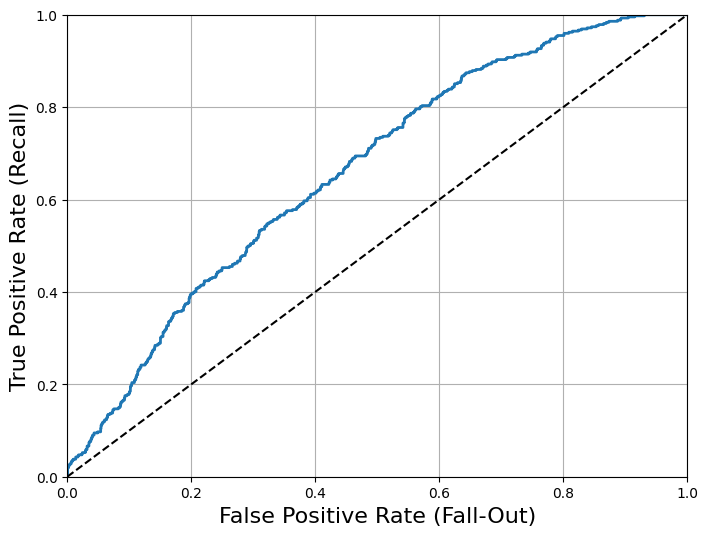

In [194]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_f0, tpr_f0)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

# Métodos Convencionais

In [173]:
M = 500;
alfa=0.05;

teta = np.angle(X_test_rec_nh.iloc[:,:500])

In [177]:
y_test_only_1=np.flatnonzero(y_test_nh)
y_test_only_0=np.flatnonzero(y_test_nh==0)

## CSM

In [174]:
CSM=(np.power((1/M)*np.sum(np.cos(teta),axis=1),2))+(np.power((1/M)*np.sum(np.sin(teta),axis=1),2))

from scipy.stats.distributions import chi2

VC_CSM=chi2.ppf(1-alfa, df=2)/(2*M)
VC_CSM

0.005991464547107979

In [199]:
y_CSM_txd=(CSM[y_test_only_1] > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM_txd = np.multiply(y_CSM_txd, 1)

y_CSM_txd=np.mean(y_CSM_txd)


y_CSM_fp=(CSM[y_test_only_0] > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM_fp = np.multiply(y_CSM_fp, 1)

y_CSM_fp=np.mean(y_CSM_fp)

y_CSM=(CSM > VC_CSM)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_CSM = np.multiply(y_CSM, 1)

fpr_CSM, tpr_CSM, thresholds_CSM = roc_curve(y_test_nh,CSM.transpose())

In [200]:
print(y_CSM_txd)
print(y_CSM_fp)

0.8412322274881516
0.12721893491124261


## MSC

In [202]:
MSC=(np.abs(np.sum(X_test_rec_nh.loc[:,:500],axis=1))**2)/(M*np.sum((np.abs(X_test_rec_nh.loc[:,:500])**2),axis=1))
MSC = np.reshape(MSC,(1,len(MSC)))

VC_MSC=1-(alfa**(1/(M-1)))
VC_MSC

0.0059854866635847825

In [203]:
y_MSC_txd=(MSC[0,y_test_only_1] > VC_MSC)
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_MSC_txd = np.multiply(y_MSC_txd, 1)

y_MSC_txd=np.mean(y_MSC_txd)

from numpy import matlib

y_MSC_fp=(MSC[0, y_test_only_0] > np.matlib.repmat(VC_MSC,1096,1))
#y_pred_limiar=int(y_pred_limiar)

# Converting boolean to integer
y_MSC_fp = np.multiply(y_MSC_fp, 1)

y_MSC_fp=np.mean(y_MSC_fp)

fpr_MSC, tpr_MSC, thresholds_MSC = roc_curve(y_test_nh,MSC.transpose())

# Comparação ROC Curve

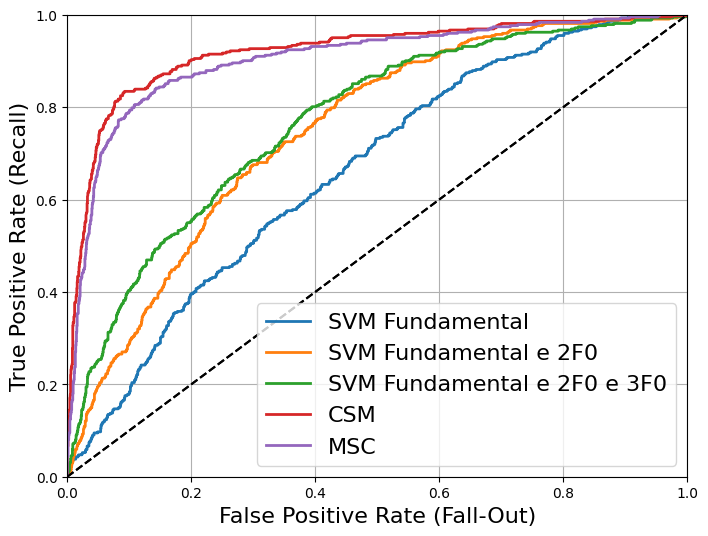

In [204]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_f0, tpr_f0, linewidth=2, label="SVM Fundamental")
plt.plot(fpr_h2, tpr_h2, linewidth=2, label="SVM Fundamental e 2F0")
plt.plot(fpr_h3, tpr_h3, linewidth=2, label="SVM Fundamental e 2F0 e 3F0")
plot_roc_curve(fpr_CSM, tpr_CSM, "CSM")
plot_roc_curve(fpr_MSC, tpr_MSC, "MSC")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()